### Test


🔹 Processing detoxify_combined_toxic_profane...

🚀 Running evaluation for detoxify_combined_toxic_profane at threshold=0.5...
⚠️ Error processing detoxify_combined_toxic_profane: Mix of label input types (string and number)

🔹 Processing detoxify_sus...

🚀 Running evaluation for detoxify_sus at threshold=0.5...

📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       0.10      1.00      0.19      6145
      Threat       0.81      0.00      0.00     53855

    accuracy                           0.10     60000
   macro avg       0.46      0.50      0.09     60000
weighted avg       0.74      0.10      0.02     60000


✅ Accuracy: 0.1033
✅ Precision: 0.8090
✅ Recall: 0.0013
✅ F1 Score: 0.0027


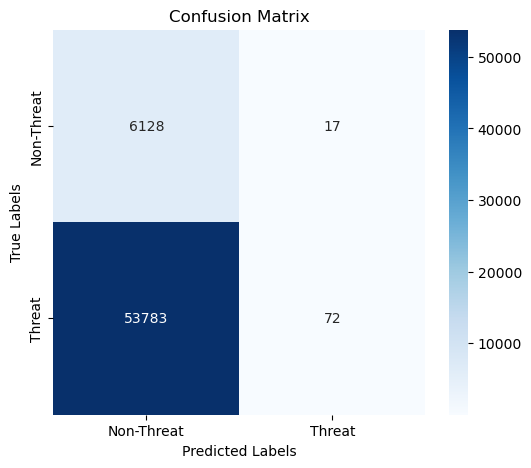

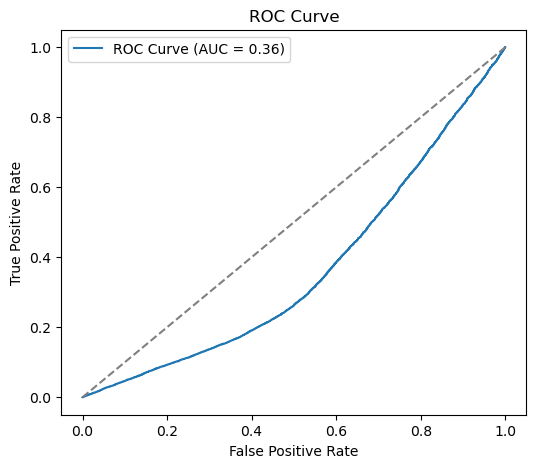

✅ AUC Score: 0.3633


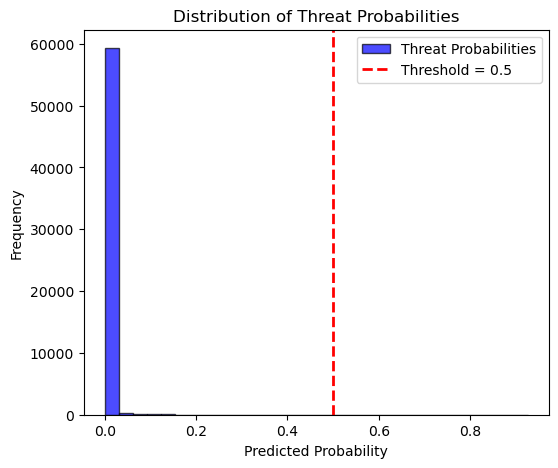


🚀 Running evaluation for detoxify_sus at threshold=0.1...

📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       0.10      0.99      0.18      6145
      Threat       0.80      0.01      0.01     53855

    accuracy                           0.11     60000
   macro avg       0.45      0.50      0.10     60000
weighted avg       0.73      0.11      0.03     60000


✅ Accuracy: 0.1059
✅ Precision: 0.8035
✅ Recall: 0.0051
✅ F1 Score: 0.0101


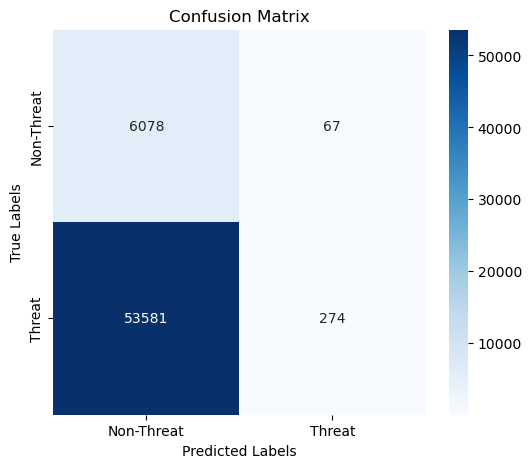

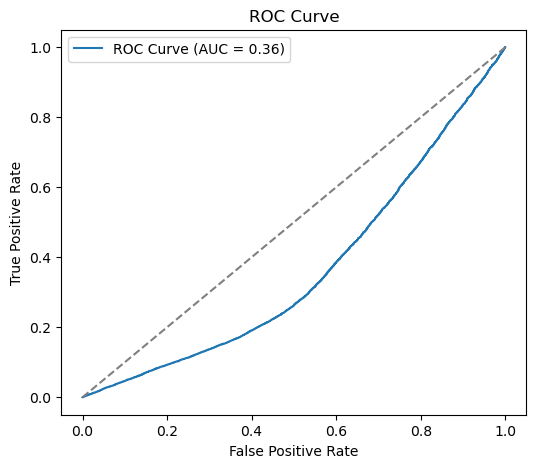

✅ AUC Score: 0.3633


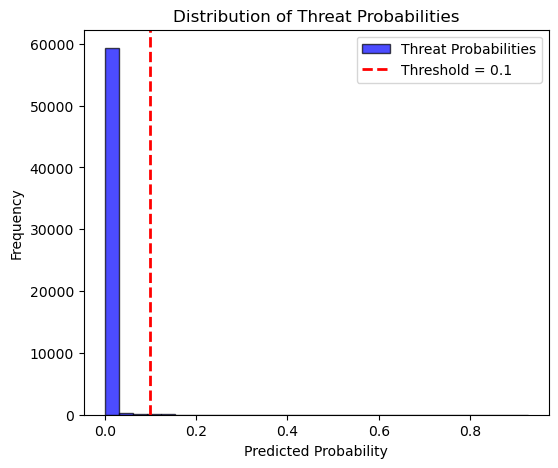


🚀 Running evaluation for detoxify_sus at threshold=0.01...

📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       0.10      0.96      0.18      6145
      Threat       0.81      0.02      0.04     53855

    accuracy                           0.12     60000
   macro avg       0.45      0.49      0.11     60000
weighted avg       0.73      0.12      0.06     60000


✅ Accuracy: 0.1169
✅ Precision: 0.8069
✅ Recall: 0.0212
✅ F1 Score: 0.0413


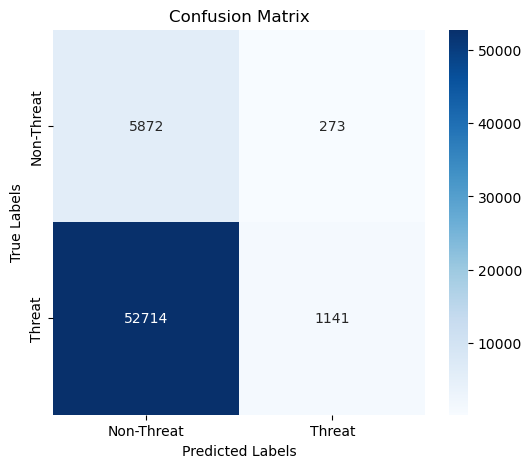

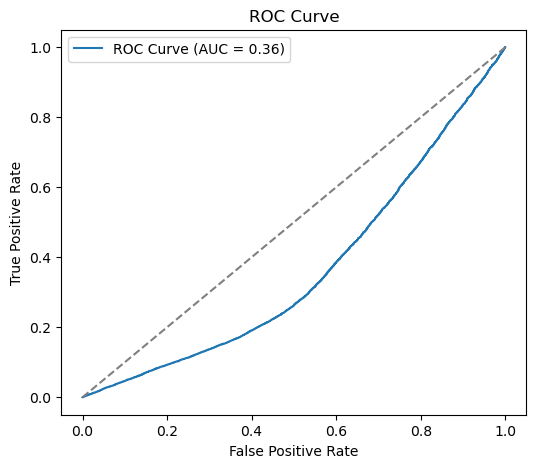

✅ AUC Score: 0.3633


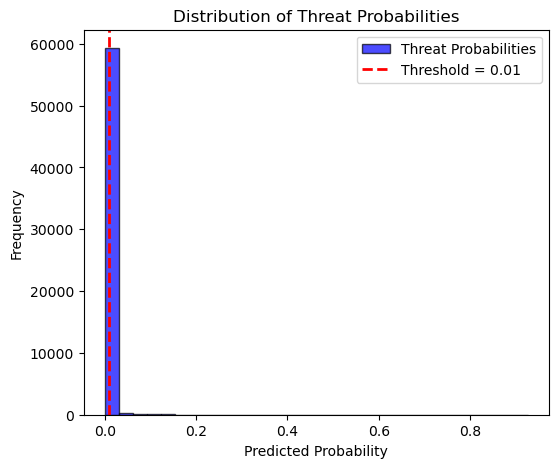


🔹 Processing Detoxify_unbiased_combined_toxic_profane...

🚀 Running evaluation for Detoxify_unbiased_combined_toxic_profane at threshold=0.5...
⚠️ Error processing Detoxify_unbiased_combined_toxic_profane: Mix of label input types (string and number)

🔹 Processing detoxify_unbiased_suspicious...

🚀 Running evaluation for detoxify_unbiased_suspicious at threshold=0.5...

📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       0.10      1.00      0.19      6145
      Threat       0.82      0.00      0.00     53855

    accuracy                           0.10     60000
   macro avg       0.46      0.50      0.09     60000
weighted avg       0.75      0.10      0.02     60000


✅ Accuracy: 0.1040
✅ Precision: 0.8194
✅ Recall: 0.0022
✅ F1 Score: 0.0044


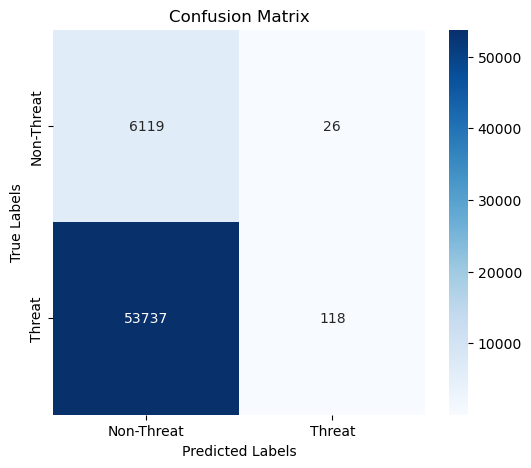

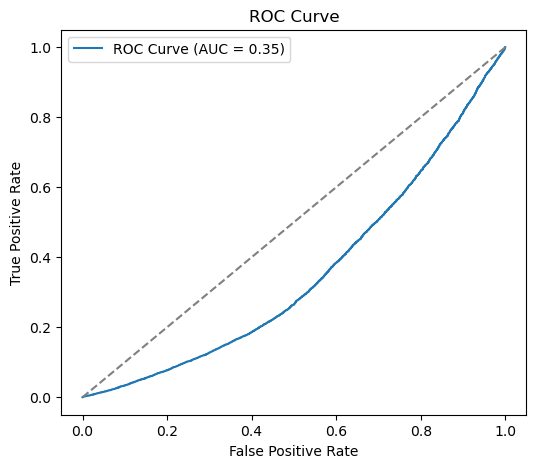

✅ AUC Score: 0.3531


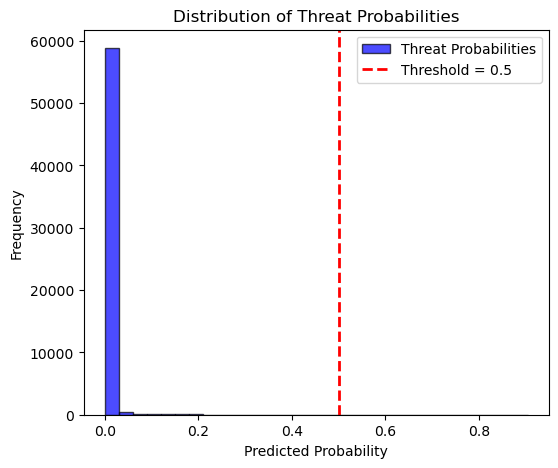


🚀 Running evaluation for detoxify_unbiased_suspicious at threshold=0.1...

📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       0.10      0.98      0.18      6145
      Threat       0.72      0.01      0.01     53855

    accuracy                           0.11     60000
   macro avg       0.41      0.49      0.10     60000
weighted avg       0.66      0.11      0.03     60000


✅ Accuracy: 0.1066
✅ Precision: 0.7248
✅ Recall: 0.0075
✅ F1 Score: 0.0148


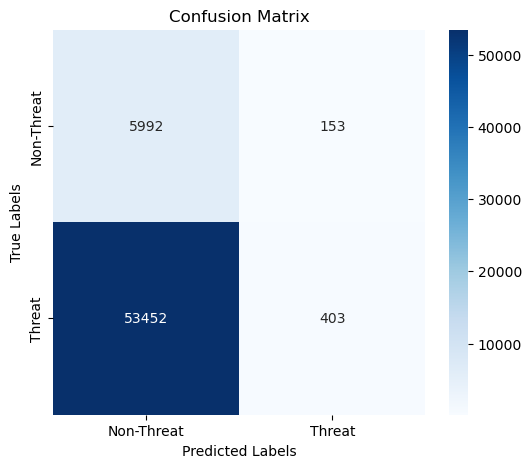

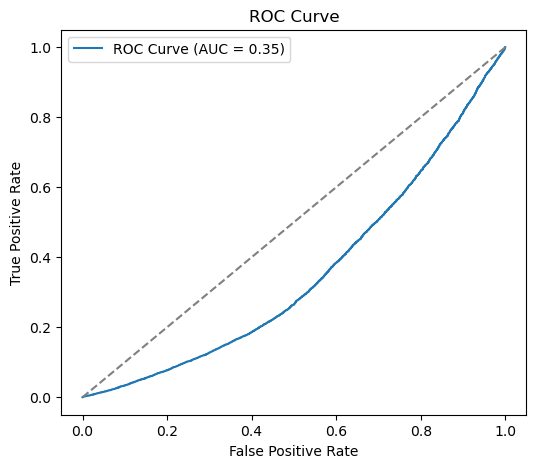

✅ AUC Score: 0.3531


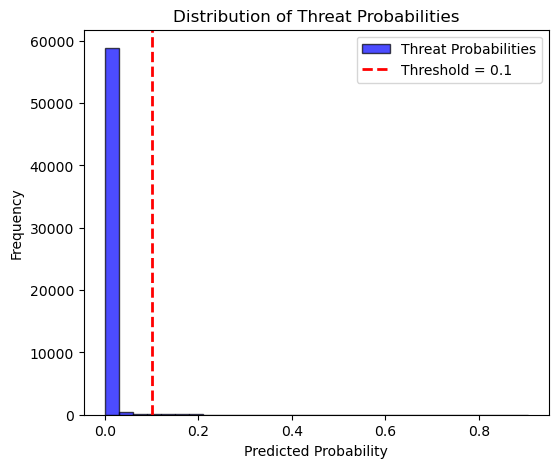


🚀 Running evaluation for detoxify_unbiased_suspicious at threshold=0.01...

📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       0.10      0.90      0.17      6145
      Threat       0.75      0.03      0.06     53855

    accuracy                           0.12     60000
   macro avg       0.42      0.47      0.12     60000
weighted avg       0.68      0.12      0.08     60000


✅ Accuracy: 0.1222
✅ Precision: 0.7466
✅ Recall: 0.0333
✅ F1 Score: 0.0638


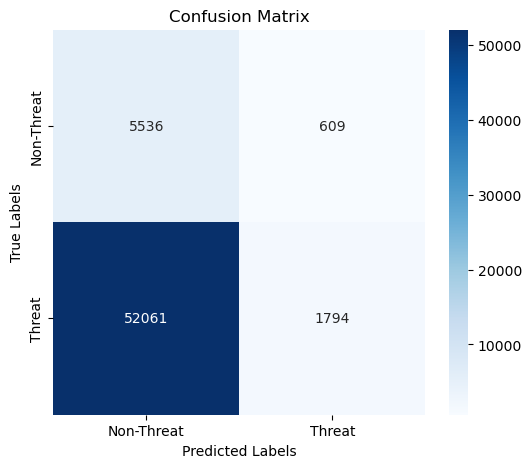

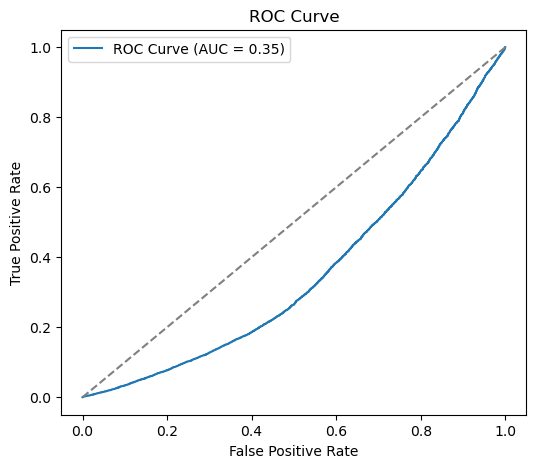

✅ AUC Score: 0.3531


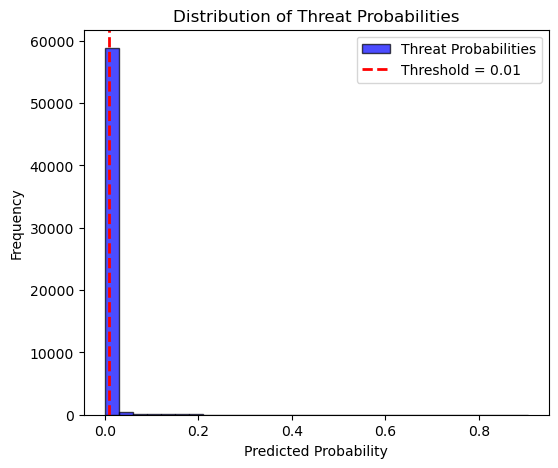

In [5]:
import os
import pandas as pd
import importlib
import sys
sys.path.append(os.path.abspath("../"))  # Add directory
import eval_metrics  # Import module

# Reload if modified
importlib.reload(eval_metrics)
from eval_metrics import evaluate_model, custom_threshold_condition

# 🔹 Set the directory containing CSV files
CSV_DIRECTORY = "./predictions/"  # Change this to the actual path

# 🔹 List all CSV files in the directory
csv_files = [f for f in os.listdir(CSV_DIRECTORY) if f.endswith(".csv")]

# 🔹 Define thresholds to test
THRESHOLDS = [0.5, 0.1, 0.01]

# 🔹 Loop through CSV files & evaluate each one
for file in csv_files:
    file_path = os.path.join(CSV_DIRECTORY, file)
    df_name = file.replace(".csv", "")  # Extract file name for reference
    print(f"\n🔹 Processing {df_name}...")

    try:
        # Load the CSV file into a DataFrame
        df = pd.read_csv(file_path)

        # Identify relevant columns dynamically
        label_col, threat_col, identity_attack_col = find_columns(df)

        # Extract ground truth labels and probabilities
        y_true = df[label_col].to_numpy()

        # Case 1: If both `threat` and `identity_attack` exist
        if identity_attack_col:
            y_probs = df[[threat_col, identity_attack_col]].to_numpy()
            custom_condition = custom_threshold_condition  # Use custom condition for combined labels
        else:
            y_probs = df[[threat_col]].to_numpy()  # Use only threat
            custom_condition = None  # No need for custom condition

        # Run evaluation at different thresholds
        for threshold in THRESHOLDS:
            print(f"\n🚀 Running evaluation for {df_name} at threshold={threshold}...")
            evaluate_model(y_true, y_probs=y_probs, class_labels=["Not Threat", "Threat"], 
                           threshold=threshold, custom_condition=custom_condition)

    except Exception as e:
        print(f"⚠️ Error processing {df_name}: {e}")


### Detoxify Toxic Comment

### Detoxify Unbiased Combined

In [28]:
s = pd.read_csv("Detoxify_unbiased_combined_toxic_profane.csv")
s.head()

,text,labels,encoded_labels,toxicity,severe_toxicity,obscene,identity_attack,insult,threat,sexual_explicit,true_label
0,Julian should receive the Gold Star award from...,['toxic' 'threat' 'insult'],"[1, 0, 1, 0, 1, 0, 0, 0, 0]",0.756582,0.000296,0.020898,0.015510,0.523093,0.010725,0.006356,1
1,"Not excusing this woman's behavior, but have y...",[],"[0, 0, 0, 0, 0, 0, 0, 0, 0]",0.213567,0.000738,0.002947,0.211578,0.016375,0.003259,0.001414,0
2,Would be fun to find the punk with the bat and...,['toxic' 'threat'],"[1, 0, 0, 0, 1, 0, 0, 0, 0]",0.785390,0.000509,0.002990,0.042268,0.021475,0.596789,0.000793,1
3,¡Smokin weed te hace querer matar!,['toxic' 'threat'],"[1, 0, 0, 0, 1, 0, 0, 0, 0]",0.031733,0.000018,0.003177,0.001489,0.008484,0.000223,0.000426,1
4,The Texas police is likely to kill a few innoc...,['toxic' 'threat' 'hate'],"[1, 0, 0, 1, 1, 0, 0, 0, 0]",0.929662,0.003621,0.012522,0.732862,0.098211,0.399425,0.003503,1


In [30]:
s.rename(columns={'labels':'ground_truth','encoded_labels':'encodings'},inplace=True)

In [9]:
# Ensure the column is properly formatted as a list
s['true_label'] = s['labels'].apply(lambda x: 1 if 'threat' in x else 0)

# Display updated DataFrame
s.head()


,text,labels,encoded_labels,toxicity,severe_toxicity,obscene,identity_attack,insult,threat,sexual_explicit,true_label
0,Go ahead and merge what you think is necessary...,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0]",0.013276,0.000020,0.001029,0.000361,0.000272,0.000346,0.000402,0
1,"""\n\n Merging Red Hand of Doom and Reliability...",[],"[0, 0, 0, 0, 0, 0, 0, 0, 0]",0.000925,0.000005,0.000155,0.000120,0.000093,0.000031,0.000058,0
2,You never responded to this: any luck? —,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0]",0.001012,0.000002,0.000069,0.000081,0.000219,0.000031,0.000028,0
3,"\fuck you, who the shit is ari?",['toxic' 'profane' 'insult'],"[1, 1, 1, 0, 0, 0, 0, 0, 0]",0.995545,0.166072,0.983968,0.033663,0.811409,0.003488,0.057676,0
4,"This is a school computer, so any edits which ...",[],"[0, 0, 0, 0, 0, 0, 0, 0, 0]",0.001679,0.000005,0.000107,0.000195,0.000096,0.000059,0.000076,0


In [13]:
# Assuming detoxify_jigsaw DataFrame is already loaded
# Check the count of true labels
label_counts = s['true_label'].value_counts()

# Determine the number of samples needed to balance
min_count = label_counts[1]  # Count of '1' labels
num_zeros = label_counts[0]  # Count of '0' labels

# If there are more '0' labels, downsample them to match '1' count
if num_zeros > min_count:
    df_ones = s[s['true_label'] == 1]
    df_zeros = s[s['true_label'] == 0].sample(n=min_count, random_state=42)
    
    # Combine balanced dataset
    balanced_df = pd.concat([df_ones, df_zeros]).sample(frac=1, random_state=42).reset_index(drop=True)
else:
    balanced_df = s.copy()  # No downsampling needed if already balanced

balanced_df['true_label'].value_counts()
s=balanced_df.copy()
len(s)

688

In [32]:
s.to_csv('Detoxify_unbiased_combined_toxic_profane.csv',index=False)


🚀 Running evaluation for Detoxify_unbiased_combined_toxic_profane at threshold=0.5...

📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       0.73      0.96      0.83       344
      Threat       0.94      0.64      0.76       344

    accuracy                           0.80       688
   macro avg       0.83      0.80      0.80       688
weighted avg       0.83      0.80      0.80       688


✅ Accuracy: 0.8009
✅ Precision: 0.9404
✅ Recall: 0.6424
✅ F1 Score: 0.7634


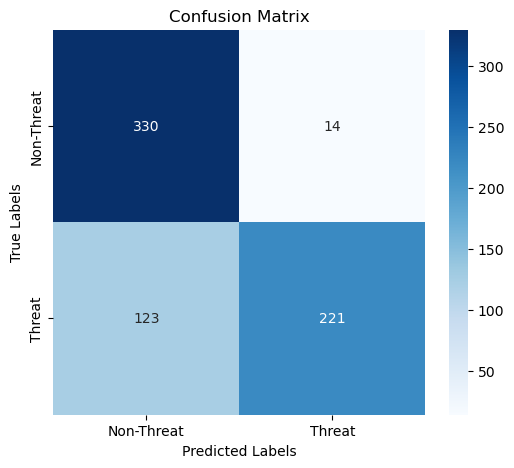

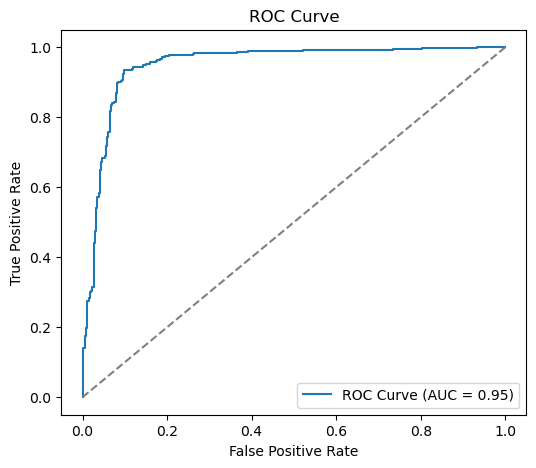

✅ AUC Score: 0.9490


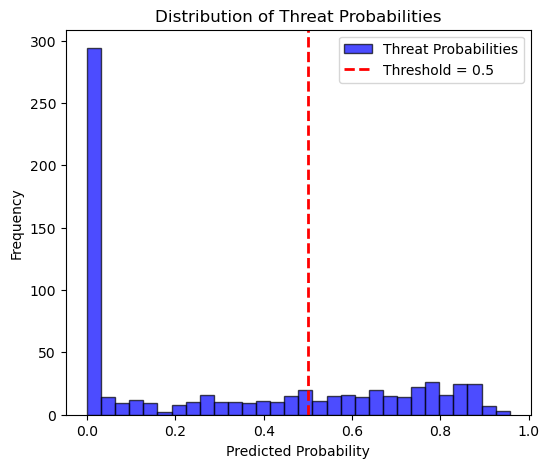


🚀 Running evaluation for Detoxify_unbiased_combined_toxic_profane at threshold=0.1...

📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       0.94      0.87      0.90       344
      Threat       0.88      0.94      0.91       344

    accuracy                           0.91       688
   macro avg       0.91      0.91      0.91       688
weighted avg       0.91      0.91      0.91       688


✅ Accuracy: 0.9084
✅ Precision: 0.8808
✅ Recall: 0.9448
✅ F1 Score: 0.9116


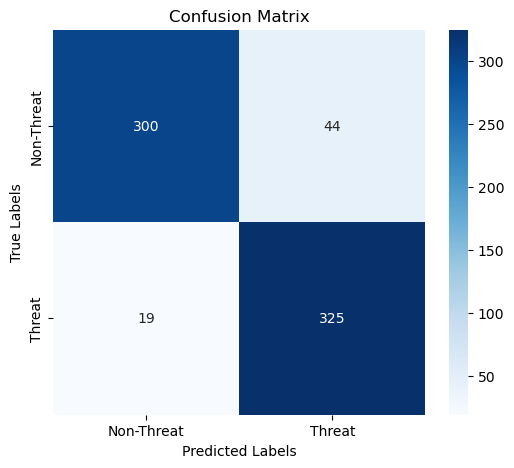

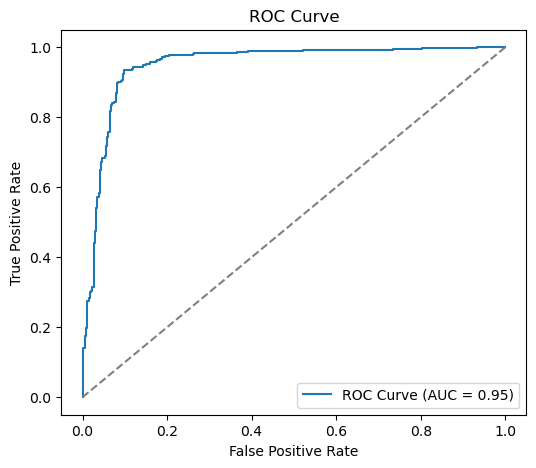

✅ AUC Score: 0.9490


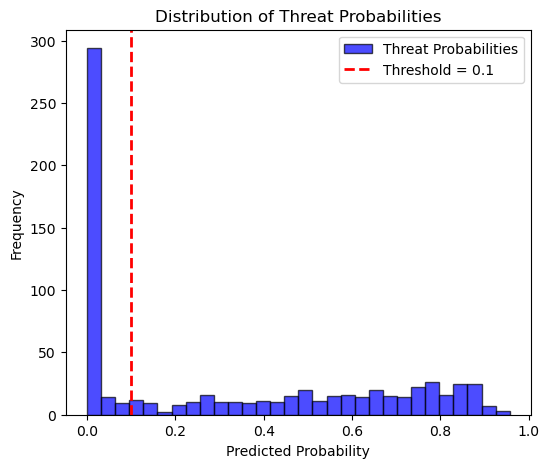


🚀 Running evaluation for Detoxify_unbiased_combined_toxic_profane at threshold=0.01...

📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       0.97      0.78      0.86       344
      Threat       0.81      0.98      0.89       344

    accuracy                           0.88       688
   macro avg       0.89      0.88      0.88       688
weighted avg       0.89      0.88      0.88       688


✅ Accuracy: 0.8765
✅ Precision: 0.8136
✅ Recall: 0.9767
✅ F1 Score: 0.8877


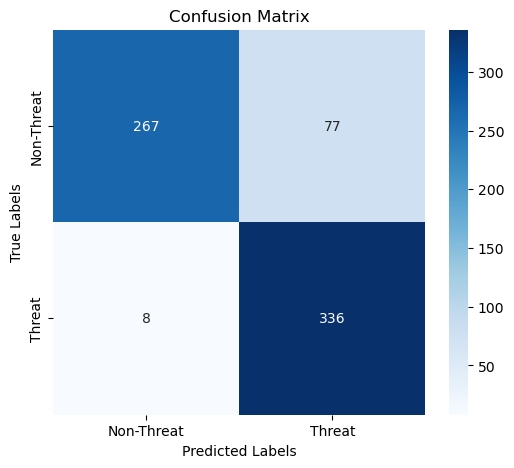

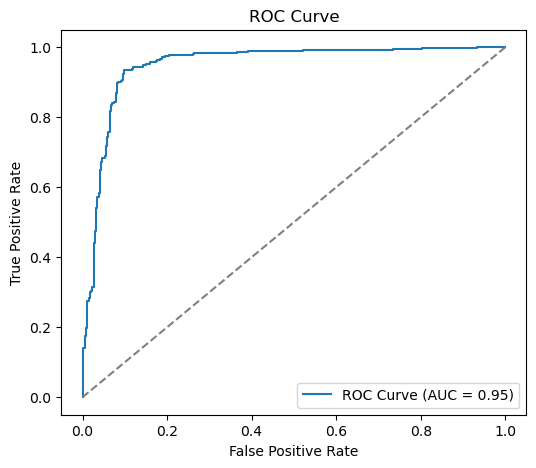

✅ AUC Score: 0.9490


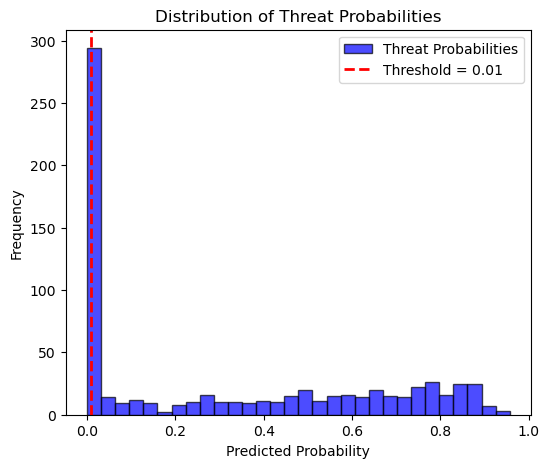

In [41]:
run_evaluation(s, "Detoxify_unbiased_combined_toxic_profane")

### Detoxify Combined

In [22]:
dc = pd.read_csv('detoxify_combined_toxic_profane.csv')
dc.head()

,text,labels,encoded_labels,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
0,Go ahead and merge what you think is necessary...,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0]",0.000634,0.000122,0.000174,0.000138,0.000182,0.000142
1,"""\n\n Merging Red Hand of Doom and Reliability...",[],"[0, 0, 0, 0, 0, 0, 0, 0, 0]",0.000591,0.000128,0.000189,0.000132,0.000176,0.000146
2,You never responded to this: any luck? —,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0]",0.000828,0.000107,0.000179,0.000119,0.000190,0.000134
3,"\fuck you, who the shit is ari?",['toxic' 'profane' 'insult'],"[1, 1, 1, 0, 0, 0, 0, 0, 0]",0.997464,0.325149,0.989654,0.002681,0.914595,0.010613
4,"This is a school computer, so any edits which ...",[],"[0, 0, 0, 0, 0, 0, 0, 0, 0]",0.000705,0.000114,0.000175,0.000121,0.000178,0.000136


In [24]:
# Ensure the column is properly formatted as a list
dc['true_label'] = dc['labels'].apply(lambda x: 1 if 'threat' in x else 0)
dc.rename(columns={'labels':'ground_truths','encoded_labels':'encodings'},inplace=True)
# Display updated DataFrame
dc.head()


,text,ground_truths,encoded_labels,toxicity,severe_toxicity,obscene,threat,insult,identity_attack,true_label
0,Go ahead and merge what you think is necessary...,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0]",0.000634,0.000122,0.000174,0.000138,0.000182,0.000142,0
1,"""\n\n Merging Red Hand of Doom and Reliability...",[],"[0, 0, 0, 0, 0, 0, 0, 0, 0]",0.000591,0.000128,0.000189,0.000132,0.000176,0.000146,0
2,You never responded to this: any luck? —,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0]",0.000828,0.000107,0.000179,0.000119,0.000190,0.000134,0
3,"\fuck you, who the shit is ari?",['toxic' 'profane' 'insult'],"[1, 1, 1, 0, 0, 0, 0, 0, 0]",0.997464,0.325149,0.989654,0.002681,0.914595,0.010613,0
4,"This is a school computer, so any edits which ...",[],"[0, 0, 0, 0, 0, 0, 0, 0, 0]",0.000705,0.000114,0.000175,0.000121,0.000178,0.000136,0


In [36]:
dc.to_csv("detoxify_combined_toxic_profane.csv",index=False)


🚀 Running evaluation for detoxify_combined_toxic_profane at threshold=0.5...

📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       1.00      0.98      0.99    283076
      Threat       0.01      0.30      0.03       344

    accuracy                           0.97    283420
   macro avg       0.51      0.64      0.51    283420
weighted avg       1.00      0.97      0.99    283420


✅ Accuracy: 0.9747
✅ Precision: 0.0145
✅ Recall: 0.2965
✅ F1 Score: 0.0277


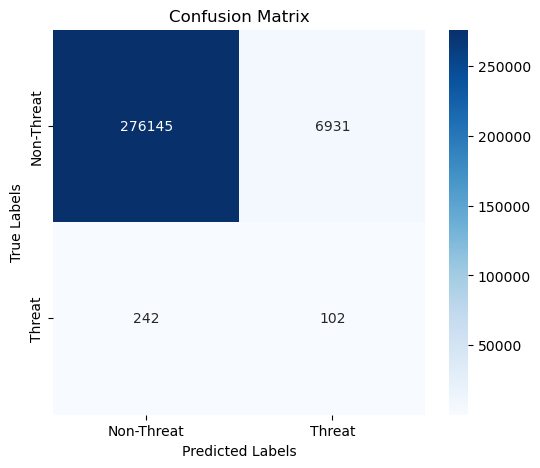

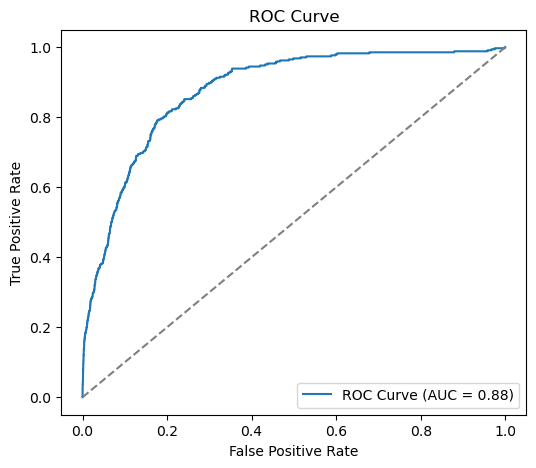

✅ AUC Score: 0.8773


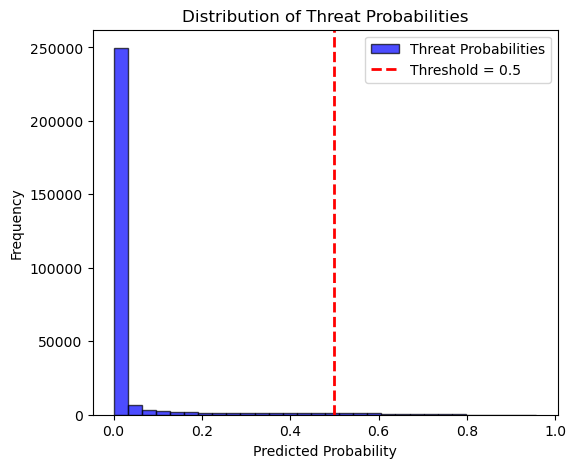


🚀 Running evaluation for detoxify_combined_toxic_profane at threshold=0.1...

📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       1.00      0.92      0.96    283076
      Threat       0.01      0.55      0.02       344

    accuracy                           0.92    283420
   macro avg       0.50      0.73      0.49    283420
weighted avg       1.00      0.92      0.96    283420


✅ Accuracy: 0.9171
✅ Precision: 0.0081
✅ Recall: 0.5523
✅ F1 Score: 0.0159


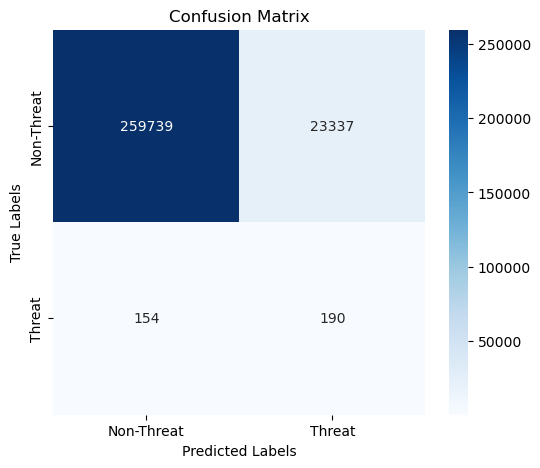

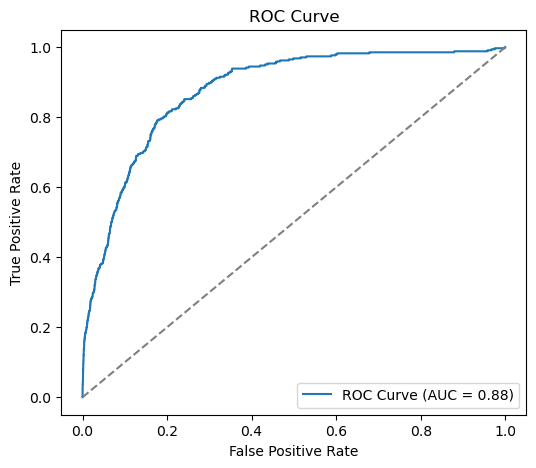

✅ AUC Score: 0.8773


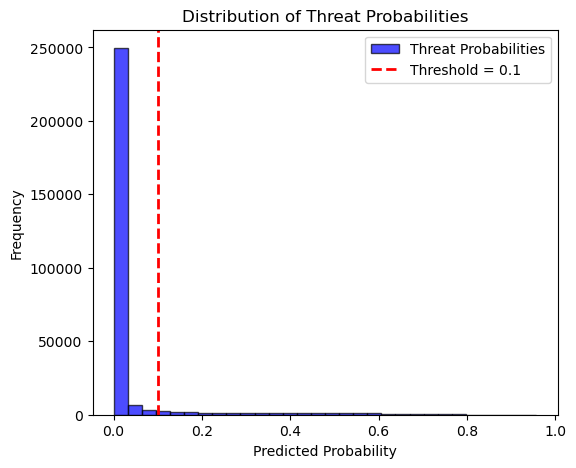


🚀 Running evaluation for detoxify_combined_toxic_profane at threshold=0.01...

📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       1.00      0.84      0.91    283076
      Threat       0.01      0.75      0.01       344

    accuracy                           0.84    283420
   macro avg       0.50      0.80      0.46    283420
weighted avg       1.00      0.84      0.91    283420


✅ Accuracy: 0.8378
✅ Precision: 0.0056
✅ Recall: 0.7529
✅ F1 Score: 0.0111


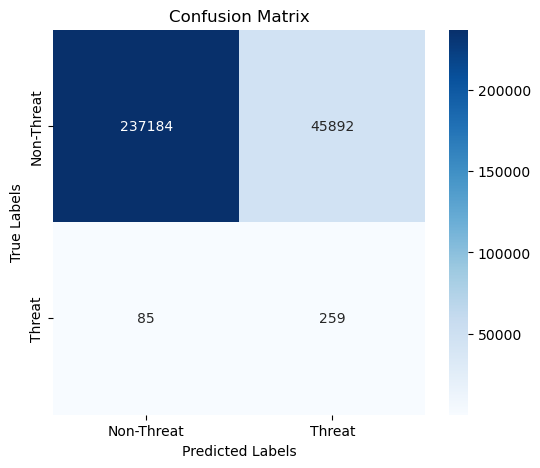

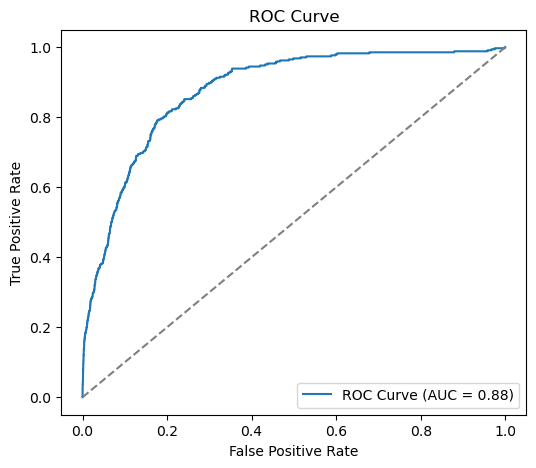

✅ AUC Score: 0.8773


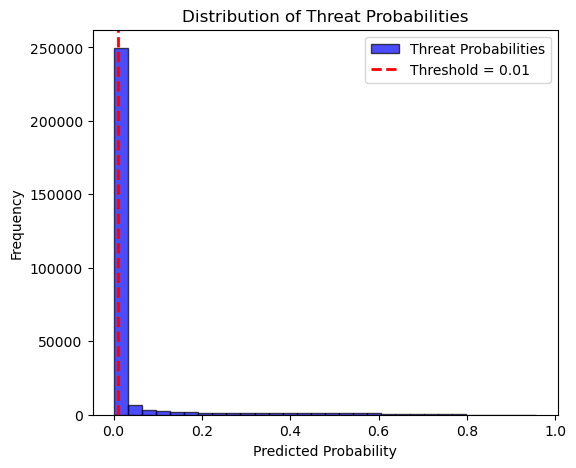

In [39]:
import os
import pandas as pd
import importlib
import sys
sys.path.append(os.path.abspath("../"))

importlib.reload(eval_metrics)
from eval_automate import run_evaluation

# Load a specific dataset
# df = pd.read_csv("some_new_dataset.csv")

# Run evaluation only on this dataset
run_evaluation(dc, "detoxify_combined_toxic_profane")
